In [1]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import numpy as np 

In [2]:
df = pd.read_csv('Dataset e analogos/dataset.csv')

In [3]:
df.shape

(10780, 13)

In [4]:
df.describe()

,Age,Daily Social Media Usage(hours),Number of Social Media Platforms,Self Reported Addiction Score,Cyberbullying Experience,Self Esteem Score,Sleep Quality,Anxiety Score,Social Media Fatigue Score
count,10780.000000,10667.000000,10780.000000,10673.000000,10780.000000,10662.000000,10670.000000,10685.000000,10780.000000
mean,29.981262,5.021656,2.892301,8.351166,0.199629,5.160570,5.464667,5.490781,5.520872
std,9.553441,2.970383,1.371924,1.737663,0.399740,2.727727,2.239109,2.257529,1.801606
min,16.000000,0.000000,1.000000,-5.000000,0.000000,1.000000,1.000000,-5.000000,1.000000
25%,22.000000,3.000000,2.000000,7.000000,0.000000,3.000000,4.000000,4.000000,4.000000
50%,30.000000,4.000000,3.000000,9.000000,0.000000,5.000000,5.000000,5.000000,5.000000
75%,35.000000,7.000000,4.000000,10.000000,0.000000,7.000000,7.000000,7.000000,7.000000
max,50.000000,24.000000,6.000000,15.000000,1.000000,10.000000,10.000000,15.000000,10.000000


In [5]:
df.dtypes

Age                                      int64
Gender                                  object
Daily Social Media Usage(hours)        float64
Number of Social Media Platforms         int64
Frequency of Posts                      object
Frequency of Checking Notifications     object
Self Reported Addiction Score          float64
Cyberbullying Experience                 int64
Self Esteem Score                      float64
Sleep Quality                          float64
Anxiety Score                          float64
Social Media Fatigue Score               int64
Mental Health Status                    object
dtype: object

In [6]:
df.isnull().mean().round(2) / 2 * 100

Age                                    0.0
Gender                                 0.0
Daily Social Media Usage(hours)        0.5
Number of Social Media Platforms       0.0
Frequency of Posts                     0.0
Frequency of Checking Notifications    0.5
Self Reported Addiction Score          0.5
Cyberbullying Experience               0.0
Self Esteem Score                      0.5
Sleep Quality                          0.5
Anxiety Score                          0.5
Social Media Fatigue Score             0.0
Mental Health Status                   0.0
dtype: float64

In [7]:
# tradução dos rótulos e seus respectivos valores
df.head()

,Age,Gender,Daily Social Media Usage(hours),Number of Social Media Platforms,Frequency of Posts,Frequency of Checking Notifications,Self Reported Addiction Score,Cyberbullying Experience,Self Esteem Score,Sleep Quality,Anxiety Score,Social Media Fatigue Score,Mental Health Status
0,25,Female,7.0,5,Rarely,Frequently,10.0,0,3.0,5.0,8.0,8,Poor
1,50,Female,2.0,4,Rarely,Frequently,6.0,1,9.0,8.0,4.0,4,Good
2,35,Female,4.0,2,Rarely,Frequently,9.0,0,6.0,6.0,5.0,8,Fair
3,30,Female,2.0,2,Rarely,Rarely,7.0,0,7.0,7.0,3.0,3,Good
4,22,Female,2.0,3,Sometimes,Occasionally,7.0,0,10.0,6.0,3.0,5,Good


In [8]:
df = df.rename(columns={'Age':'Idade', 'Gender':'Genero', 'Daily Social Media Usage(hours)':'Tempo de Uso em Redes Sociais', 'Number of Social Media Platforms':'Numero de Plataformas Usadas',
                   'Frequency of Posts':'Frenquencia de Posts', 'Frequency of Checking Notifications':'Frequencia de Verificacao por Notificacoes', 'Self Reported Addiction Score':'Taxa de Reconhecimento de Dependencia',
                   'Cyberbullying Score':'Experiencia por Cyberbullying', 'Self Esteem Score':'Taxa de Autoestima Reportada', 'Sleep Quality':'Qualidade de Sono', 'Anxiety Score':'Taxa de Ansiedade',
                   'Social Media Fatigue Score':'Fadiga Gerada pelo Uso de Redes Sociais', 'Mental Health Status':'Status de Saude Mental'})

In [9]:
df['Genero'] = df['Genero'].replace({'Female':'Feminino', 'Male':'Masculino', 'Other':'Outro'})

In [10]:
df['Frenquencia de Posts'] = df['Frenquencia de Posts'].replace({'Rarely':'Raramente', 'Sometimes':'Algumas vezes', 'Never':'Nunca',
                                                                 'Always':'Sempre', 'Often':'Geralmente'})

In [11]:
df['Frequencia de Verificacao por Notificacoes'] = df['Frequencia de Verificacao por Notificacoes'].replace({'Frequently':'Frequentimente', 'Occasionally':'Ocasionalmente',
                                                                                                           'Rarely':'Raramente'})

In [12]:
df['Status de Saude Mental'] = df['Status de Saude Mental'].replace({'Poor':'Ruim', 'Fair':'Razoavel', 'Excellent':'Excelente', 'Good':'Boa'})

In [13]:
df.head(10)

,Idade,Genero,Tempo de Uso em Redes Sociais,Numero de Plataformas Usadas,Frenquencia de Posts,Frequencia de Verificacao por Notificacoes,Taxa de Reconhecimento de Dependencia,Cyberbullying Experience,Taxa de Autoestima Reportada,Qualidade de Sono,Taxa de Ansiedade,Fadiga Gerada pelo Uso de Redes Sociais,Status de Saude Mental
0,25,Feminino,7.0,5,Raramente,Frequentimente,10.0,0,3.0,5.0,8.0,8,Ruim
1,50,Feminino,2.0,4,Raramente,Frequentimente,6.0,1,9.0,8.0,4.0,4,Boa
2,35,Feminino,4.0,2,Raramente,Frequentimente,9.0,0,6.0,6.0,5.0,8,Razoavel
3,30,Feminino,2.0,2,Raramente,Raramente,7.0,0,7.0,7.0,3.0,3,Boa
4,22,Feminino,2.0,3,Algumas vezes,Ocasionalmente,7.0,0,10.0,6.0,3.0,5,Boa
5,22,Masculino,6.0,3,Algumas vezes,Frequentimente,10.0,0,5.0,9.0,6.0,7,Razoavel
6,18,Masculino,6.0,1,Algumas vezes,Raramente,10.0,0,4.0,4.0,6.0,4,Ruim
7,45,Masculino,3.0,1,Nunca,Frequentimente,7.0,0,8.0,8.0,5.0,4,Boa
8,30,Feminino,4.0,4,Sempre,Raramente,9.0,0,6.0,5.0,5.0,5,Razoavel
9,35,Masculino,9.0,2,Algumas vezes,Frequentimente,10.0,0,1.0,6.0,7.0,9,Ruim


In [14]:
df.isnull().sum()

Idade                                           0
Genero                                          0
Tempo de Uso em Redes Sociais                 113
Numero de Plataformas Usadas                    0
Frenquencia de Posts                            0
Frequencia de Verificacao por Notificacoes    115
Taxa de Reconhecimento de Dependencia         107
Cyberbullying Experience                        0
Taxa de Autoestima Reportada                  118
Qualidade de Sono                             110
Taxa de Ansiedade                              95
Fadiga Gerada pelo Uso de Redes Sociais         0
Status de Saude Mental                          0
dtype: int64

In [15]:
df.isnull().mean().round(2) / 2 * 100

Idade                                         0.0
Genero                                        0.0
Tempo de Uso em Redes Sociais                 0.5
Numero de Plataformas Usadas                  0.0
Frenquencia de Posts                          0.0
Frequencia de Verificacao por Notificacoes    0.5
Taxa de Reconhecimento de Dependencia         0.5
Cyberbullying Experience                      0.0
Taxa de Autoestima Reportada                  0.5
Qualidade de Sono                             0.5
Taxa de Ansiedade                             0.5
Fadiga Gerada pelo Uso de Redes Sociais       0.0
Status de Saude Mental                        0.0
dtype: float64

In [16]:
df = df.dropna()

In [17]:
df.shape

(10137, 13)

<Axes: xlabel='Genero', ylabel='Idade'>

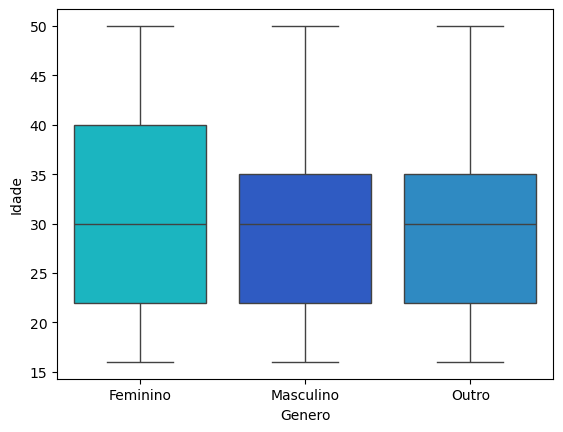

In [18]:
colors = ['#00CDDB', '#1651DB', '#1690DB']
sns.boxplot(df, x=df['Genero'], y=df['Idade'], hue=df['Genero'], palette=colors )

In [19]:
# Verificando assimetrias para genero Feminino
df_F = df.loc[df['Genero'] == 'Feminino']

In [20]:
Q1 = np.quantile(df_F['Idade'], 0.25)
Q2 = np.quantile(df_F['Idade'], 0.50)
Q3 = np.quantile(df_F['Idade'], 0.75)

In [21]:
Q1, Q2, Q3

(np.float64(22.0), np.float64(30.0), np.float64(40.0))

In [22]:
IQ = Q3 - Q1
IQ

np.float64(18.0)

In [23]:
Valor_superior = Q3 + (IQ * 1.5)
Valor_superior

np.float64(67.0)

In [24]:
Valor_inferior = (IQ * 1.5) - Q1
Valor_inferior

np.float64(5.0)

In [25]:
coeficiente_bowley_feminino= ((Q3 - Q2) - (Q2 - Q1)) / (Q3 - Q1)

In [26]:
coeficiente_bowley_feminino.round(3)

np.float64(0.111)

<Axes: xlabel='Idade', ylabel='Count'>

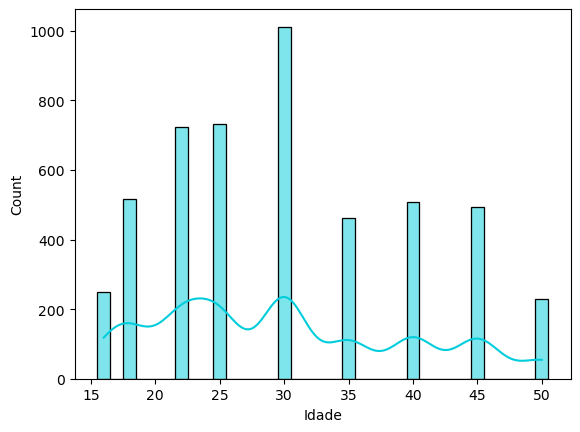

In [52]:
sns.histplot(df_F, x=df_F['Idade'], kde=True, discrete=True, color='#00CDDB')

In [28]:
df_M = df.loc[df['Genero'] == 'Masculino']

In [29]:
df_M.head()

,Idade,Genero,Tempo de Uso em Redes Sociais,Numero de Plataformas Usadas,Frenquencia de Posts,Frequencia de Verificacao por Notificacoes,Taxa de Reconhecimento de Dependencia,Cyberbullying Experience,Taxa de Autoestima Reportada,Qualidade de Sono,Taxa de Ansiedade,Fadiga Gerada pelo Uso de Redes Sociais,Status de Saude Mental
5,22,Masculino,6.0,3,Algumas vezes,Frequentimente,10.0,0,5.0,9.0,6.0,7,Razoavel
6,18,Masculino,6.0,1,Algumas vezes,Raramente,10.0,0,4.0,4.0,6.0,4,Ruim
7,45,Masculino,3.0,1,Nunca,Frequentimente,7.0,0,8.0,8.0,5.0,4,Boa
9,35,Masculino,9.0,2,Algumas vezes,Frequentimente,10.0,0,1.0,6.0,7.0,9,Ruim
11,50,Masculino,0.0,4,Nunca,Frequentimente,6.0,1,10.0,3.0,1.0,3,Boa


In [30]:
Q1_M = np.quantile(df_M['Idade'], 0.25)
Q2_M = np.quantile(df_M['Idade'], 0.50)
Q3_M = np.quantile(df_M['Idade'], 0.75)
IQ_M = Q3_M - Q1_M

In [31]:
Coeficiente_Bowley_masculino = ((Q3_M - Q2_M) - (Q2_M - Q1_M)) / (Q3_M - Q1_M)

In [32]:
Coeficiente_Bowley_masculino.round(3)

np.float64(-0.231)

<Axes: xlabel='Idade', ylabel='Count'>

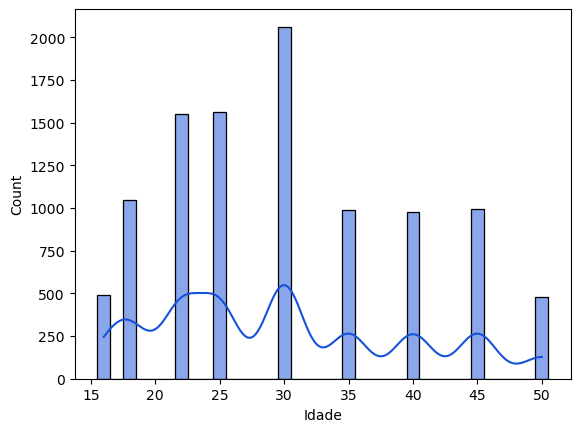

In [53]:
sns.histplot(df_M, x=df['Idade'], kde=True, discrete=True, color='#1651DB')

In [34]:
df_O = df.loc[df['Genero'] == 'Outro']

In [35]:
df_O.head(20)

,Idade,Genero,Tempo de Uso em Redes Sociais,Numero de Plataformas Usadas,Frenquencia de Posts,Frequencia de Verificacao por Notificacoes,Taxa de Reconhecimento de Dependencia,Cyberbullying Experience,Taxa de Autoestima Reportada,Qualidade de Sono,Taxa de Ansiedade,Fadiga Gerada pelo Uso de Redes Sociais,Status de Saude Mental
24,30,Outro,2.0,2,Raramente,Ocasionalmente,7.0,0,8.0,5.0,4.0,4,Boa
55,45,Outro,3.0,1,Raramente,Ocasionalmente,10.0,0,8.0,4.0,3.0,4,Boa
85,25,Outro,12.0,5,Algumas vezes,Frequentimente,10.0,0,1.0,7.0,10.0,8,Ruim
169,30,Outro,0.0,2,Nunca,Frequentimente,6.0,0,10.0,6.0,2.0,3,Excelente
232,30,Outro,3.0,4,Algumas vezes,Ocasionalmente,6.0,0,9.0,6.0,4.0,6,Boa
274,30,Outro,7.0,4,Algumas vezes,Ocasionalmente,10.0,1,3.0,6.0,8.0,6,Ruim
300,18,Outro,6.0,3,Algumas vezes,Ocasionalmente,10.0,1,4.0,4.0,6.0,5,Ruim
319,22,Outro,2.0,1,Geralmente,Ocasionalmente,6.0,0,8.0,9.0,3.0,5,Excelente
359,30,Outro,4.0,2,Raramente,Frequentimente,10.0,0,8.0,8.0,8.0,6,Boa
397,25,Outro,6.0,2,Algumas vezes,Ocasionalmente,10.0,0,4.0,3.0,4.0,5,Ruim


In [36]:
Q1_O = np.quantile(df_O['Idade'], 0.25)
Q2_O = np.quantile(df_O['Idade'], 0.50)
Q3_O = np.quantile(df_O['Idade'], 0.75)
Coeficiente_Bowley_outros = ((Q3_O - Q2_O) - (Q2_O - Q1_O)) / (Q3_O - Q1_O)
Coeficiente_Bowley_outros.round(3)

np.float64(-0.231)

<Axes: xlabel='Idade', ylabel='Count'>

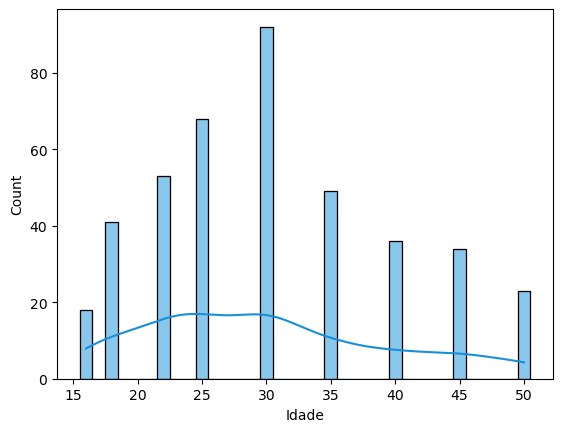

In [54]:
sns.histplot(df_O, x=df_O['Idade'], kde=True, hue_order=df_O[''],discrete=True, color='#1690DB')

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
df.head(20)

,Idade,Genero,Tempo de Uso em Redes Sociais,Numero de Plataformas Usadas,Frenquencia de Posts,Frequencia de Verificacao por Notificacoes,Taxa de Reconhecimento de Dependencia,Cyberbullying Experience,Taxa de Autoestima Reportada,Qualidade de Sono,Taxa de Ansiedade,Fadiga Gerada pelo Uso de Redes Sociais,Status de Saude Mental
0,25,Feminino,7.0,5,Raramente,Frequentimente,10.0,0,3.0,5.0,8.0,8,Ruim
1,50,Feminino,2.0,4,Raramente,Frequentimente,6.0,1,9.0,8.0,4.0,4,Boa
2,35,Feminino,4.0,2,Raramente,Frequentimente,9.0,0,6.0,6.0,5.0,8,Razoavel
3,30,Feminino,2.0,2,Raramente,Raramente,7.0,0,7.0,7.0,3.0,3,Boa
4,22,Feminino,2.0,3,Algumas vezes,Ocasionalmente,7.0,0,10.0,6.0,3.0,5,Boa
5,22,Masculino,6.0,3,Algumas vezes,Frequentimente,10.0,0,5.0,9.0,6.0,7,Razoavel
6,18,Masculino,6.0,1,Algumas vezes,Raramente,10.0,0,4.0,4.0,6.0,4,Ruim
7,45,Masculino,3.0,1,Nunca,Frequentimente,7.0,0,8.0,8.0,5.0,4,Boa
8,30,Feminino,4.0,4,Sempre,Raramente,9.0,0,6.0,5.0,5.0,5,Razoavel
9,35,Masculino,9.0,2,Algumas vezes,Frequentimente,10.0,0,1.0,6.0,7.0,9,Ruim


In [40]:
encoder = OrdinalEncoder(categories=[['Nunca', 'Algumas vezes', 'Raramente', 'Geralmente', 'Sempre']])

In [41]:
df['Frequencia de Posts (Ordinal)'] = encoder.fit_transform(df[['Frenquencia de Posts']])

In [42]:
encoder = OrdinalEncoder(categories=[['Raramente', 'Ocasionalmente', 'Frequentimente']])

In [43]:
df['Frequencia de Verificacao por Notificacoes (Ordinal)'] = encoder.fit_transform(df[['Frequencia de Verificacao por Notificacoes']])

In [44]:
encoder = OrdinalEncoder(categories=[['Ruim', 'Razoavel', 'Boa', 'Excelente']])

In [45]:
df['Status de Saude Mental (Ordinal)'] = encoder.fit_transform(df[['Status de Saude Mental']])

In [46]:
df.head(20)

,Idade,Genero,Tempo de Uso em Redes Sociais,Numero de Plataformas Usadas,Frenquencia de Posts,Frequencia de Verificacao por Notificacoes,Taxa de Reconhecimento de Dependencia,Cyberbullying Experience,Taxa de Autoestima Reportada,Qualidade de Sono,Taxa de Ansiedade,Fadiga Gerada pelo Uso de Redes Sociais,Status de Saude Mental,Frequencia de Posts (Ordinal),Frequencia de Verificacao por Notificacoes (Ordinal),Status de Saude Mental (Ordinal)
0,25,Feminino,7.0,5,Raramente,Frequentimente,10.0,0,3.0,5.0,8.0,8,Ruim,2.0,2.0,0.0
1,50,Feminino,2.0,4,Raramente,Frequentimente,6.0,1,9.0,8.0,4.0,4,Boa,2.0,2.0,2.0
2,35,Feminino,4.0,2,Raramente,Frequentimente,9.0,0,6.0,6.0,5.0,8,Razoavel,2.0,2.0,1.0
3,30,Feminino,2.0,2,Raramente,Raramente,7.0,0,7.0,7.0,3.0,3,Boa,2.0,0.0,2.0
4,22,Feminino,2.0,3,Algumas vezes,Ocasionalmente,7.0,0,10.0,6.0,3.0,5,Boa,1.0,1.0,2.0
5,22,Masculino,6.0,3,Algumas vezes,Frequentimente,10.0,0,5.0,9.0,6.0,7,Razoavel,1.0,2.0,1.0
6,18,Masculino,6.0,1,Algumas vezes,Raramente,10.0,0,4.0,4.0,6.0,4,Ruim,1.0,0.0,0.0
7,45,Masculino,3.0,1,Nunca,Frequentimente,7.0,0,8.0,8.0,5.0,4,Boa,0.0,2.0,2.0
8,30,Feminino,4.0,4,Sempre,Raramente,9.0,0,6.0,5.0,5.0,5,Razoavel,4.0,0.0,1.0
9,35,Masculino,9.0,2,Algumas vezes,Frequentimente,10.0,0,1.0,6.0,7.0,9,Ruim,1.0,2.0,0.0


In [47]:
ordenacao_variaveis = ['Idade', 'Genero', 'Tempo de Uso em Redes Sociais', 'Numero de Plataformas Usadas', 'Frenquencia de Posts', 'Frequencia de Posts (Ordinal)', 'Frequencia de Verificacao por Notificacoes',
                       'Frequencia de Verificacao por Notificacoes (Ordinal)', 'Taxa de Reconhecimento de Dependencia', 'Cyberbullying Experience', 'Taxa de Autoestima Reportada',
                       'Qualidade de Sono', 'Taxa de Ansiedade', 'Fadiga Gerada pelo Uso de Redes Sociais', 'Status de Saude Mental', 'Status de Saude Mental (Ordinal)']

In [48]:
df = df[ordenacao_variaveis]

In [49]:
df.head(1)

,Idade,Genero,Tempo de Uso em Redes Sociais,Numero de Plataformas Usadas,Frenquencia de Posts,Frequencia de Posts (Ordinal),Frequencia de Verificacao por Notificacoes,Frequencia de Verificacao por Notificacoes (Ordinal),Taxa de Reconhecimento de Dependencia,Cyberbullying Experience,Taxa de Autoestima Reportada,Qualidade de Sono,Taxa de Ansiedade,Fadiga Gerada pelo Uso de Redes Sociais,Status de Saude Mental,Status de Saude Mental (Ordinal)
0,25,Feminino,7.0,5,Raramente,2.0,Frequentimente,2.0,10.0,0,3.0,5.0,8.0,8,Ruim,0.0
